In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install pyspark==3.5.4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from scipy.stats import pointbiserialr

In [ ]:
PATH = '/content/drive/MyDrive/DataSet/'

In [ ]:
df = pd.read_csv(PATH+'TrainTest01.csv', index_col=0)
df01 = pd.read_csv(PATH+'Stream01.csv', index_col=0)

# Understanding the column data
print(df.info())
print(f"\nShape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
Index: 405262 entries, 3/1/2024_9E_JAX_LGA_4816 to 12/31/2024_YX_LGA_EYW_5821
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   QUARTER            405262 non-null  int64  
 1   MONTH              405262 non-null  int64  
 2   DAY_OF_MONTH       405262 non-null  int64  
 3   DAY_OF_WEEK        405262 non-null  int64  
 4   OP_UNIQUE_CARRIER  405262 non-null  object 
 5   ORIGIN             405262 non-null  object 
 6   DEST               405262 non-null  object 
 7   DISTANCE           405262 non-null  float64
 8   CRS_DEP_TIME       405262 non-null  int64  
 9   DEP_TIME           405262 non-null  float64
 10  DEP_DELAY          405262 non-null  float64
 11  DEP_DELAY_NEW      405262 non-null  float64
 12  DEP_DEL15          405262 non-null  float64
 13  ARR_DEL15          405262 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 46.4+ MB
None

In [ ]:
print(df01.info())

<class 'pandas.core.frame.DataFrame'>
Index: 101673 entries, 1/1/2025_AA_CLT_TPA_798 to 1/31/2025_YX_EWR_JAX_3538
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   QUARTER            101673 non-null  int64  
 1   MONTH              101673 non-null  int64  
 2   DAY_OF_MONTH       101673 non-null  int64  
 3   DAY_OF_WEEK        101673 non-null  int64  
 4   OP_UNIQUE_CARRIER  101673 non-null  int64  
 5   ORIGIN             101673 non-null  int64  
 6   DEST               101673 non-null  int64  
 7   DISTANCE           101673 non-null  float64
 8   CRS_DEP_TIME       101673 non-null  int64  
 9   DEP_TIME           101673 non-null  float64
 10  DEP_DELAY          101673 non-null  float64
 11  DEP_DELAY_NEW      101673 non-null  float64
 12  DEP_DEL15          101673 non-null  float64
 13  ARR_DEL15          101673 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 15.7+ MB
None


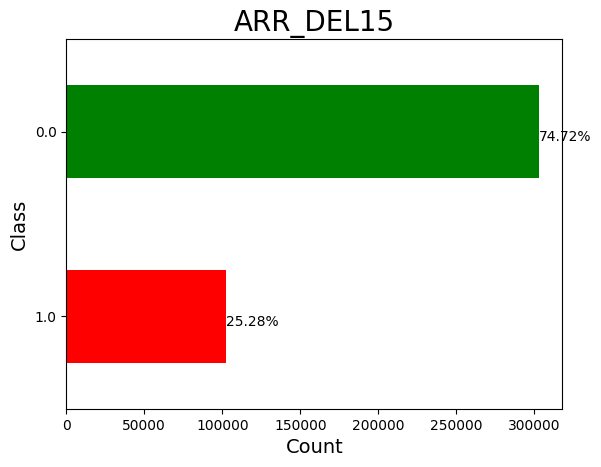

ARR_DEL15
0.0    302813
1.0    102449
Name: count, dtype: int64


In [ ]:
# Plotting the percentage of observations that fall under each class
ax = df["ARR_DEL15"].value_counts().sort_values().plot(kind="barh", color=["r", "g"])
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20,
     str(round((i.get_width()/total)*100, 2))+'%',
     fontsize=10, color='black')
plt.title("ARR_DEL15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(df["ARR_DEL15"].value_counts())
fig = ax.get_figure()

In [ ]:
labelEncoder = LabelEncoder()
df["ORIGIN"] = labelEncoder.fit_transform(df["ORIGIN"])
df["DEST"] = labelEncoder.fit_transform(df["DEST"])
df["OP_UNIQUE_CARRIER"] = labelEncoder.fit_transform(df["OP_UNIQUE_CARRIER"])

ategorical = [
    "QUARTER", "MONTH", "DAY_OF_MONTH", "ORIGIN", "DEST",
    "CRS_DEP_TIME", "DEP_TIME", "DEP_DEL15", "ARR_DEL15"
]

numeric = [
    "DEP_DELAY"
]

target = df["ARR_DEL15"]

pbc = list()
for col in numeric:
    corr, pval = pointbiserialr(df[col], target)
    pbc.append([col, corr, pval])

pbc_corr = pd.DataFrame(pbc, columns=["Feature", "CorrCoeff", "pValue"]) \
             .sort_values(by="CorrCoeff", ascending=False) \
             .reset_index(drop=True)

print(pbc_corr)

     Feature  CorrCoeff  pValue
0  DEP_DELAY   0.509954     0.0


In [ ]:
labelEncoder = LabelEncoder()
df["ORIGIN"] = labelEncoder.fit_transform(df["ORIGIN"])
df["DEST"] = labelEncoder.fit_transform(df["DEST"])
df["OP_UNIQUE_CARRIER"] = labelEncoder.fit_transform(df["OP_UNIQUE_CARRIER"])
features = df.loc[:, df.columns != "ARR_DEL15"]
labels = np.asarray(df["ARR_DEL15"])
print(features.columns)
df[["ORIGIN", "DEST", "OP_UNIQUE_CARRIER"]]

Index(['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'ORIGIN', 'DEST', 'DISTANCE', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15'],
      dtype='object')


,ORIGIN,DEST,OP_UNIQUE_CARRIER
ID,,,
3/1/2024_9E_JAX_LGA_4816,71,78,0
3/1/2024_9E_JAX_LGA_4989,71,78,0
3/1/2024_9E_LGA_JAX_4989,78,71,0
3/1/2024_9E_ATL_TLH_5423,4,146,0
3/1/2024_9E_TLH_ATL_5423,146,4,0
...,...,...,...
12/31/2024_YX_EWR_SRQ_3588,43,139,13
12/31/2024_YX_JAX_ORD_3566,71,99,13
12/31/2024_YX_ORD_JAX_3674,99,71,13


In [ ]:
labelEncoder = LabelEncoder()
df01["ORIGIN"] = labelEncoder.fit_transform(df01["ORIGIN"])
df01["DEST"] = labelEncoder.fit_transform(df01["DEST"])
df01["OP_UNIQUE_CARRIER"] = labelEncoder.fit_transform(df01["OP_UNIQUE_CARRIER"])
features01 = df01.loc[:, df01.columns != "ARR_DEL15"]
labels01 = np.asarray(df01["ARR_DEL15"])
print(features.columns)
df01[["ORIGIN", "DEST", "OP_UNIQUE_CARRIER"]]

Index(['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'ORIGIN', 'DEST', 'DISTANCE', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15'],
      dtype='object')


,ORIGIN,DEST,OP_UNIQUE_CARRIER
ID,,,
1/1/2025_AA_CLT_TPA_798,27,142,0
1/1/2025_AA_TPA_CLT_798,142,27,0
1/1/2025_AA_CLT_SRQ_1452,27,133,0
1/1/2025_AA_SRQ_CLT_465,133,27,0
1/1/2025_AA_DFW_TPA_844,35,142,0
...,...,...,...
1/31/2025_YX_ORD_JAX_3577,95,68,12
1/31/2025_YX_EWR_JAX_3523,43,68,12
1/31/2025_YX_JAX_EWR_3587,68,43,12


In [ ]:
print(f"\nDataset shape: {df.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")


Dataset shape: (405262, 14)
features_train shape: (324209, 13) | features_test shape: (81053, 13)
labels_train shape: (324209,) | labels_test shape: (81053,)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(features_train, labels_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
model_pred = model.predict(features_test)
print(classification_report(labels_test, model_pred))
accuracy = accuracy_score(labels_test, model_pred)
f1_mic = f1_score(labels_test, model_pred, average='micro')
f1_mac = f1_score(labels_test, model_pred, average='macro')
# In kết quả
print('='*15 + 'Test Data' + '='*15)
print(f'Accuracy: {accuracy * 100:.5f}%')
print(f'F1-Micro: {f1_mic * 100:.5f}%')
print(f'F1-Macro: {f1_mac * 100:.5f}%')

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     60540
         1.0       0.91      0.75      0.82     20513

    accuracy                           0.92     81053
   macro avg       0.91      0.86      0.88     81053
weighted avg       0.92      0.92      0.92     81053

===============Test Data===============
Accuracy: 91.79179%
F1-Micro: 91.79179%
F1-Macro: 88.45002%


In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(features_train, labels_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
model_pred = model.predict(features_test)
print(classification_report(labels_test, model_pred))
accuracy = accuracy_score(labels_test, model_pred)
f1_mic = f1_score(labels_test, model_pred, average='micro')
f1_mac = f1_score(labels_test, model_pred, average='macro')
# In kết quả
print('='*15 + 'Test Data' + '='*15)
print(f'Accuracy: {accuracy * 100:.5f}%')
print(f'F1-Micro: {f1_mic * 100:.5f}%')
print(f'F1-Macro: {f1_mac * 100:.5f}%')

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91     60540
         1.0       0.74      0.76      0.75     20513

    accuracy                           0.87     81053
   macro avg       0.83      0.84      0.83     81053
weighted avg       0.87      0.87      0.87     81053

===============Test Data===============
Accuracy: 87.15655%
F1-Micro: 87.15655%
F1-Macro: 83.20669%


In [ ]:
import xgboost as xgb


In [ ]:
model = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(features_train, labels_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_pred = model.predict(features_test)
print(classification_report(labels_test, model_pred))
accuracy = accuracy_score(labels_test, model_pred)
f1_mic = f1_score(labels_test, model_pred, average='micro')
f1_mac = f1_score(labels_test, model_pred, average='macro')
# In kết quả
print('='*15 + 'Test Data' + '='*15)
print(f'Accuracy: {accuracy * 100:.5f}%')
print(f'F1-Micro: {f1_mic * 100:.5f}%')
print(f'F1-Macro: {f1_mac * 100:.5f}%')

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     60540
         1.0       0.92      0.75      0.83     20513

    accuracy                           0.92     81053
   macro avg       0.92      0.87      0.89     81053
weighted avg       0.92      0.92      0.92     81053

===============Test Data===============
Accuracy: 92.10517%
F1-Micro: 92.10517%
F1-Macro: 88.87142%


In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(features_train, labels_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
model_pred = model.predict(features_test)
print(classification_report(labels_test, model_pred))
accuracy = accuracy_score(labels_test, model_pred)
f1_mic = f1_score(labels_test, model_pred, average='micro')
f1_mac = f1_score(labels_test, model_pred, average='macro')
# In kết quả
print('='*15 + 'Test Data' + '='*15)
print(f'Accuracy: {accuracy * 100:.5f}%')
print(f'F1-Micro: {f1_mic * 100:.5f}%')
print(f'F1-Macro: {f1_mac * 100:.5f}%')

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     60540
         1.0       0.92      0.75      0.83     20513

    accuracy                           0.92     81053
   macro avg       0.92      0.86      0.89     81053
weighted avg       0.92      0.92      0.92     81053

===============Test Data===============
Accuracy: 92.01510%
F1-Micro: 92.01510%
F1-Macro: 88.73750%


In [ ]:
model = ExtraTreesClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(features_train, labels_train)

ExtraTreesClassifier(max_depth=10, random_state=42)

In [ ]:
model_pred = model.predict(features_test)
print(classification_report(labels_test, model_pred))
accuracy = accuracy_score(labels_test, model_pred)
f1_mic = f1_score(labels_test, model_pred, average='micro')
f1_mac = f1_score(labels_test, model_pred, average='macro')
# In kết quả
print('='*15 + 'Test Data' + '='*15)
print(f'Accuracy: {accuracy * 100:.5f}%')
print(f'F1-Micro: {f1_mic * 100:.5f}%')
print(f'F1-Macro: {f1_mac * 100:.5f}%')

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     60540
         1.0       0.81      0.81      0.81     20513

    accuracy                           0.91     81053
   macro avg       0.88      0.88      0.88     81053
weighted avg       0.91      0.91      0.91     81053

===============Test Data===============
Accuracy: 90.59874%
F1-Micro: 90.59874%
F1-Macro: 87.56733%


In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features_train, labels_train)

In [27]:
print(f"After SMOTE - X_resampled shape: {X_resampled.shape} | y_resampled shape: {y_resampled.shape}")


After SMOTE - X_resampled shape: (484546, 13) | y_resampled shape: (484546,)


In [28]:
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# 📈 4. Dự đoán và đánh giá
y_pred = model.predict(features_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# 🔍 5. Đánh giá mô hình
print("\nConfusion Matrix:")
print(confusion_matrix(labels_test, y_pred))

print("\nClassification Report:")
print(classification_report(labels_test, y_pred, digits=4))


Confusion Matrix:
[[56851  3689]
 [ 3861 16652]]

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9364    0.9391    0.9377     60540
         1.0     0.8186    0.8118    0.8152     20513

    accuracy                         0.9069     81053
   macro avg     0.8775    0.8754    0.8765     81053
weighted avg     0.9066    0.9069    0.9067     81053

